In [35]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

## Import Data

In [2]:
df = pd.read_json('cleaned_data.json')
df.head()

,Name,Address,Author,Price,Bedrooms,Showers,Parking,Furnish,Total Developed,Features,...,Nearby Places,URL,Timestamp,City,Region,Island,Type,NFeatures,NFacilities,NNearby Places
0,"3 BR Condo in The Grand Midori Ortigas, Pasig",,"Federal Land, Inc.",29700000,3,3.0,2,0,107.0,"[Ensuite, Range Hood, Stove/Burner]",...,"[School, Hospital]",https://propertyaccess.ph/property/3-br-condo-...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,3,11,2
1,"1 Bedroom Condo in The Grand Midori Ortigas, P...",,"Federal Land, Inc.",10200000,1,1.0,0,0,46.0,[Fiber ready],...,"[School, Hospital]",https://propertyaccess.ph/property/1br-condo-i...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,1,11,2
2,"3 Bedroom Condo in Aurelia Residences, Taguig","McKinley Parkway, Taguig, Metro Manila",Shang Properties,107300000,3,4.0,2,0,242.0,"[Central air conditioning, Balcony, Built-in w...",...,"[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Taguig,National Capital Region,Luzon,Condo,10,15,4
3,3 Bedroom Condo in Shang Residences at Wack Wa...,"Wack Wack Road, Mandaluyong, Metro Manila",Shang Properties,54500000,3,4.0,3,0,231.0,"[Central air conditioning, Balcony, Built-in w...",...,"[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/3-bedroom-c...,2022-10-23,Mandaluyong,National Capital Region,Luzon,Condo,9,16,4
4,"2BR Condo in Residences at The Galleon, Pasig",,Ortigas Land,41500000,2,2.0,2,0,109.0,"[Central air conditioning, Balcony, Built-in w...",...,"[School, Hospital, Mall, Transportation hub]",https://propertyaccess.ph/property/2br-condo-i...,2022-10-23,Pasig,National Capital Region,Luzon,Condo,7,14,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2490
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             2269 non-null   object        
 1   Address          2269 non-null   object        
 2   Author           2269 non-null   object        
 3   Price            2269 non-null   int64         
 4   Bedrooms         2269 non-null   int64         
 5   Showers          2269 non-null   float64       
 6   Parking          2269 non-null   int64         
 7   Furnish          2269 non-null   int64         
 8   Total Developed  2269 non-null   float64       
 9   Features         2269 non-null   object        
 10  Facilities       2269 non-null   object        
 11  Nearby Places    2269 non-null   object        
 12  URL              2269 non-null   object        
 13  Timestamp        2269 non-null   datetime64[ns]
 14  City             2269 non-null   object 

In [31]:
# data to be used for clustering
data = df[['Price', 'Bedrooms', 'Showers', 'Parking', 'Total Developed']]

## Affinity Propagration
https://machinelearningmastery.com/clustering-algorithms-with-python/

In [16]:
from sklearn.cluster import AffinityPropagation

In [6]:
model = AffinityPropagation(damping=0.9)

In [26]:
# fit the model
model.fit(data)

AffinityPropagation(damping=0.9)

In [27]:
# assign a cluster to each example
yhat = model.predict(data)

# retrieve unique clusters
clusters = np.unique(yhat)

clusters

array([0, 1], dtype=int64)

In [28]:
data[yhat == 1].describe()

,Price,Bedrooms,Showers,Parking,Total Developed
count,2.241000e+03,2241.000000,2241.000000,2241.000000,2241.000000
mean,2.415990e+07,2.567604,2.247434,1.182062,174.906778
std,3.100183e+07,1.513630,1.315014,1.243145,291.526980
min,1.400000e+04,1.000000,1.000000,0.000000,15.000000
25%,6.325000e+06,1.000000,1.000000,0.000000,41.000000
50%,1.250000e+07,2.000000,2.000000,1.000000,83.000000
75%,2.850000e+07,4.000000,3.000000,2.000000,224.320000
max,1.980000e+08,10.000000,5.000000,6.000000,7440.000000


In [29]:
data[yhat == 0].describe()

,Price,Bedrooms,Showers,Parking,Total Developed
count,2.800000e+01,28.000000,28.000000,28.000000,28.000000
mean,2.644214e+08,4.607143,4.214286,3.428571,956.678571
std,5.813546e+07,1.448864,0.994695,1.136224,883.138052
min,2.000000e+08,1.000000,1.000000,0.000000,107.000000
25%,2.200000e+08,4.000000,4.000000,3.000000,483.000000
50%,2.500000e+08,4.000000,4.500000,4.000000,802.500000
75%,2.883250e+08,5.250000,5.000000,4.000000,1200.000000
max,4.000000e+08,7.000000,5.000000,4.000000,5117.000000


Has 2 clusters, clusters are seperated mainly based on the price and total developed.

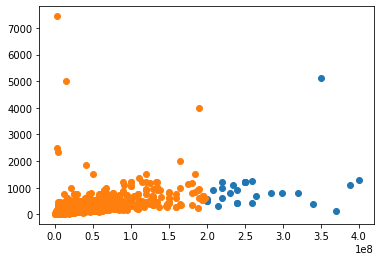

In [40]:
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get rows that exists in each cluster
    row = data[yhat == cluster]
    # create scatter of these samples
    plt.scatter(row['Price'], row['Total Developed'])
# show the plot
plt.show()

## DBSCAN
https://machinelearningmastery.com/clustering-algorithms-with-python/

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
model = DBSCAN(eps=0.30, min_samples=9)

In [42]:
yhat = model.fit_predict(data)

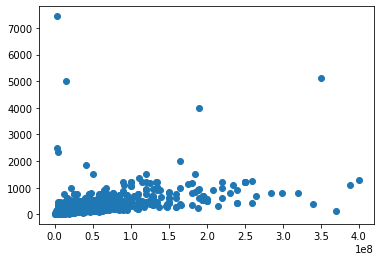

In [40]:
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get rows that exists in each cluster
    row = data[yhat == cluster]
    # create scatter of these samples
    plt.scatter(row['Price'], row['Total Developed'])
# show the plot
plt.show()

## OPTICS
https://machinelearningmastery.com/clustering-algorithms-with-python/

C:\users\chris\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


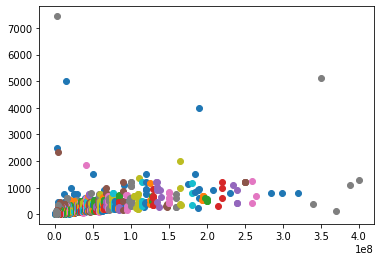

In [60]:
from sklearn.cluster import OPTICS

# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(data)

# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get rows that exists in each cluster
    row = data[yhat == cluster]
    # create scatter of these samples
    plt.scatter(row['Price'], row['Total Developed'])
# show the plot
plt.show()

In [55]:
df.loc[data[yhat == clusters[0]].index].groupby(['Type', 'Island']).mean()

Price  Bedrooms   Showers   Parking   Furnish  \
Type  Island                                                           
Condo Luzon     2.110796e+07  1.752427  1.618932  0.485437  0.723301   
      Mindanao  3.271000e+06  1.000000  1.000000  0.000000  0.000000   
      Visayas   5.249775e+07  2.700000  2.200000  1.100000  0.500000   
House Luzon     4.295314e+07  3.706215  3.186441  2.101695  0.813559   
      Mindanao  1.250000e+07  4.666667  4.000000  2.666667  2.000000   
      Visayas   1.788874e+07  4.357143  3.107143  2.000000  0.714286   

                Total Developed  NFeatures  NFacilities  NNearby Places  
Type  Island                                                             
Condo Luzon          100.353689   3.398058     7.582524        2.752427  
      Mindanao        24.000000   2.000000     8.000000        4.000000  
      Visayas         83.200000   2.900000     9.000000        2.400000  
House Luzon          369.926554   4.446328     0.000000        0.000000  
      Mindanao       250.000000   7.000000     0.000000        0.000000  
      Visayas        272.428571   4.714286     0.071429        0.000000

## Gaussian Mixture Model
https://machinelearningmastery.com/clustering-algorithms-with-python/

1035 7616232.893719806
266 91174849.46992481
8 343912500.0
942 25069899.56581741
18 169093666.66666666


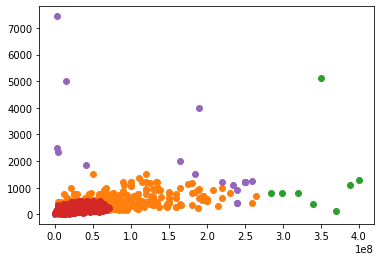

In [76]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=5)
# fit the model
model.fit(data)
# assign a cluster to each example
yhat = model.predict(data)

# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get rows that exists in each cluster
    row = data[yhat == cluster]
    print(len(row), row['Price'].mean())
    # create scatter of these samples
    plt.scatter(row['Price'], row['Total Developed'])
# show the plot
plt.show()